# Effect of removing examples

Support vectors are defined as training examples that influence the decision boundary. In this exercise, you'll observe this behavior by removing non support vectors from the training set.

The wine quality dataset is already loaded into X and y (first two features only). (Note: we specify lims in plot_classifier() so that the two plots are forced to use the same axis limits and can be compared directly.)
**Instructions*

- Train a linear SVM on the whole data set.
- Create a new data set containing only the support vectors.
- Train a new linear SVM on the smaller data set.


In [32]:
from sklearn.datasets import load_wine
from sklearn.datasets import load_digits
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC


In [19]:
def plot_contours(ax, clf, xx, yy, proba=False, **params):
    """Plot the decision boundaries for a classifier.
    
    Parameters
    ----------
        ax: matplotlib axes object
        clf: a classifier
        xx: meshgrid ndarray
        yy: meshgrid ndarray
        params: dictionary of params to pass to contourf, optional
    """
    if proba:
        Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:,-1]
        Z = Z.reshape(xx.shape)
        out = ax.imshow(Z,extent=(np.min(xx), np.max(xx), np.min(yy), np.max(yy)), 
                        origin='lower', vmin=0, vmax=1, **params)
        ax.contour(xx, yy, Z, levels=[0.5])
    else:
        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        out = ax.contourf(xx, yy, Z, **params)
    return out

In [20]:
'''
Source: https://colab.research.google.com/github/goodboychan/goodboychan.github.io/blob/main/_notebooks/2020-07-05-01-Applying-logistic-regression-and-SVM.ipynb#scrollTo=51PmBVb5sQMv
'''

def make_meshgrid(x, y, h=.02, lims=None):
    """Create a mesh of points to plot in
    
    Parameters
    ----------
        x: data to base x-axis meshgrid on
        y: data to base y-axis meshgrid on
        h: stepsize for meshgrid, optional
        
    Returns
    -------
        xx, yy : ndarray
    """
    
    if lims is None:
        x_min, x_max = x.min() - 1, x.max() + 1
        y_min, y_max = y.min() - 1, y.max() + 1
    else:
        x_min, x_max, y_min, y_max = lims
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy
##############################################################
def plot_classifier(X, y, clf, ax=None, ticks=False, proba=False, lims=None): 
    # assumes classifier "clf" is already fit
    X0, X1 = X[:, 0], X[:, 1]
    xx, yy = make_meshgrid(X0, X1, lims=lims)
    
    if ax is None:
        plt.figure()
        ax = plt.gca()
        show = True
    else:
        show = False
        
    # can abstract some of this into a higher-level function for learners to call
    cs = plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8, proba=proba)
    if proba:
        cbar = plt.colorbar(cs)
        cbar.ax.set_ylabel('probability of red $\Delta$ class', fontsize=20, rotation=270, labelpad=30)
        cbar.ax.tick_params(labelsize=14)
        #ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=30, edgecolors=\'k\', linewidth=1)
    labels = np.unique(y)
    if len(labels) == 2:
        ax.scatter(X0[y==labels[0]], X1[y==labels[0]], cmap=plt.cm.coolwarm, 
                   s=60, c='b', marker='o', edgecolors='k')
        ax.scatter(X0[y==labels[1]], X1[y==labels[1]], cmap=plt.cm.coolwarm, 
                   s=60, c='r', marker='^', edgecolors='k')
    else:
        ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=50, edgecolors='k', linewidth=1)

    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    #     ax.set_xlabel(data.feature_names[0])
    #     ax.set_ylabel(data.feature_names[1])
    if ticks:
        ax.set_xticks(())
        ax.set_yticks(())
        #     ax.set_title(title)
    if show:
        plt.show()
    else:
        return ax

In [21]:
wine = load_wine()
X = wine.data[:,:2]
X.shape

(178, 2)

In [22]:
y = wine.target
y.shape

(178,)

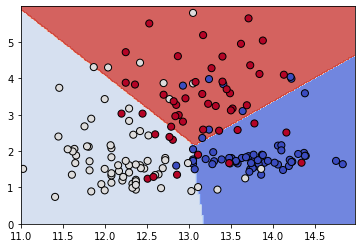

Number of original examples 178
Number of support vectors 81


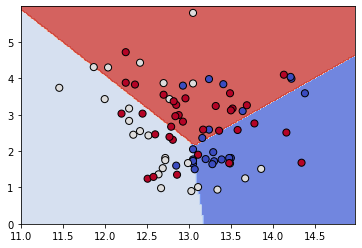

In [23]:
# Train a linear SVM
svm = SVC(kernel="linear")
svm.fit(X, y)
plot_classifier(X, y, svm, lims=(11,15,0,6))

# Make a new data set keeping only the support vectors
print("Number of original examples", len(X))
print("Number of support vectors", len(svm.support_))
X_small = X[svm.support_]
y_small = y[svm.support_]

# Train a new SVM using only the support vectors
svm_small = SVC(kernel="linear")
svm_small.fit(X_small, y_small)
plot_classifier(X_small, y_small, svm_small, lims=(11,15,0,6))

In [24]:
svm.support_

array([  1,   2,   4,  19,  21,  23,  24,  25,  26,  27,  35,  36,  37,
        38,  39,  41,  43,  44,  45,  46,  50,  57,  61,  62,  66,  68,
        71,  72,  73,  76,  79,  81,  83,  85,  92,  93,  99, 102, 105,
       107, 110, 111, 118, 119, 122, 123, 124, 129, 130, 131, 132, 133,
       134, 135, 136, 138, 139, 140, 141, 142, 144, 148, 150, 151, 152,
       154, 157, 158, 159, 160, 161, 162, 163, 164, 167, 168, 170, 171,
       172, 176, 177], dtype=int32)

# GridSearchCV warm-up

In the video we saw that increasing the RBF kernel hyperparameter gamma increases training accuracy. In this exercise we'll search for the gamma that maximizes cross-validation accuracy using scikit-learn's GridSearchCV. A binary version of the handwritten digits dataset, in which you're just trying to predict whether or not an image is a "2", is already loaded into the variables X and y.

**Instructions**

- Create a GridSearchCV object.
- Call the fit() method to select the best value of gamma based on cross-validation accuracy.


In [47]:
digits = load_digits()


In [51]:
X = digits.data[:898,:]
X.shape

(898, 64)

In [53]:
y = digits.target == 2
y = y[:898]
y.shape

(898,)

In [54]:
from sklearn.model_selection import GridSearchCV
# Instantiate an RBF SVM
svm = SVC()

# Instantiate the GridSearchCV object and run the search
parameters = {'gamma':[0.00001, 0.0001, 0.001, 0.01, 0.1]}
searcher = GridSearchCV(svm, parameters)
searcher.fit(X, y)

# Report the best parameters
print("Best CV params", searcher.best_params_)

Best CV params {'gamma': 0.001}


In [55]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y)

# Instantiate an RBF SVM
svm = SVC()

# Instantiate the GridSearchCV object and run the search
parameters = {'C':[0.1, 1, 10], 'gamma':[0.00001, 0.0001, 0.001, 0.01, 0.1]}
searcher = GridSearchCV(svm, parameters)
searcher.fit(X_train, y_train)

# Report the best parameters and the corresponding score
print("Best CV params", searcher.best_params_)
print("Best CV accuracy", searcher.best_score_)

# Report the test accuracy using these best parameters
print("Test accuracy of best grid search hypers:", searcher.score(X_test, y_test))

Best CV params {'C': 1, 'gamma': 0.001}
Best CV accuracy 0.9985074626865671
Test accuracy of best grid search hypers: 0.9955555555555555


# Using SGDClassifier

In this final coding exercise, you'll do a hyperparameter search over the regularization type, regularization strength, and the loss (logistic regression vs. linear SVM) using SGDClassifier().

**Instructions**

- Instantiate an SGDClassifier instance with random_state=0.
- Search over the regularization strength, the hinge vs. log losses, and L1 vs. L2 regularization.


In [57]:
from sklearn.linear_model import SGDClassifier
# We set random_state=0 for reproducibility 
linear_classifier = SGDClassifier(random_state=0)

# Instantiate the GridSearchCV object and run the search
parameters = {'alpha':[0.00001, 0.0001, 0.001, 0.01, 0.1, 1], 
             'loss':['hinge','log'], 'penalty':['l1', 'l2']}
searcher = GridSearchCV(linear_classifier, parameters, cv=10)
searcher.fit(X_train, y_train)

# Report the best parameters and the corresponding score
print("Best CV params", searcher.best_params_)
print("Best CV accuracy", searcher.best_score_)
print("Test accuracy of best grid search hypers:", searcher.score(X_test, y_test))

Best CV params {'alpha': 0.1, 'loss': 'log', 'penalty': 'l2'}
Best CV accuracy 0.9985074626865671
Test accuracy of best grid search hypers: 0.9866666666666667


# How does this course fit into data science?

You now have practice applying logistic regression and support vector machines to classification problems. 
**How does this fit into a bigger picture?** 
The way I see it, data science is the process of answering questions and making decisions based on data. 
The data science process usually combines several of the following pieces: `data collection`, `data preparation`, `database design`, `visualization`, `communication`, `software engineering`, `machine learning`, and more. 

In this course we focused on the machine learning portion. 
Machine learning has several branches like supervised learning, unsupervised learning, and reinforcement learning. 
We've been focusing on supervised learning, which means trying to 
- predict a target value from features given a labeled data set. Within supervised learning, 
- we've focussed on classification, which means the thing we're trying to predict is categorical rather than a continuous in nature. 
